In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
from os import listdir
import cv2
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg

In [ ]:
print("Yüz maskesi 'with' etiketli görüntülerin sayısı:",len(os.listdir('/content/drive/MyDrive/deeplearningproject/Data/with_mask')))
print("Yüz maskesi 'without' etiketli görüntülerin sayısı:",len(os.listdir('/content/drive/MyDrive/deeplearningproject/Data/without_mask')))

Yüz maskesi 'with' etiketli görüntülerin sayısı: 3725
Yüz maskesi 'without' etiketli görüntülerin sayısı: 3828


In [ ]:
data_path="/content/drive/MyDrive/deeplearningproject/Data/"
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'with_mask': 0, 'without_mask': 1}
['with_mask', 'without_mask']
[0, 1]


In [ ]:
img_size=224
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Görüntü gri skala ile kaplanır
            resized=cv2.resize(gray,(img_size,img_size))
            #Veri kümesindeki tüm görüntüler için sabit bir ortak boyuta ihtiyacımız olduğundan gri skalayı 224x224 olarak yeniden boyutlandırdık
            data.append(resized)
            target.append(label_dict[category])
            #Görüntü ve etiket (kategorilere ayrılmış) listeye (veri kümesi) eklemek

        except Exception as e:
            print('Exception:',e)
            #herhangi bir istisna varsa, burada yazdırılacak. Ve sonraki resme geçilecek

In [ ]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [ ]:
np.save('data',data)
np.save('target',new_target)

In [ ]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [ ]:
data

array([[[[0.30980392],
         [0.33333333],
         [0.37254902],
         ...,
         [0.45098039],
         [0.42745098],
         [0.39215686]],

        [[0.30980392],
         [0.32941176],
         [0.37254902],
         ...,
         [0.45882353],
         [0.42745098],
         [0.39215686]],

        [[0.30980392],
         [0.32941176],
         [0.37254902],
         ...,
         [0.4627451 ],
         [0.42745098],
         [0.39215686]],

        ...,

        [[0.12156863],
         [0.12941176],
         [0.13333333],
         ...,
         [0.43921569],
         [0.42745098],
         [0.41960784]],

        [[0.12156863],
         [0.12941176],
         [0.13333333],
         ...,
         [0.43921569],
         [0.42745098],
         [0.41960784]],

        [[0.12156863],
         [0.12941176],
         [0.13333333],
         ...,
         [0.43921569],
         [0.42745098],
         [0.41960784]]],


       [[[0.18039216],
         [0.18039216],
         [0.18

In [ ]:
target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


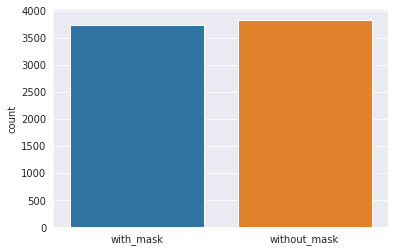

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

l = []
for i in target:
    if(i[0] == 1):
        l.append("with_mask")
    else:
        l.append("without_mask")
sns.set_style('darkgrid')
sns.countplot(l)